In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from urllib.request import urlretrieve
iris = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [42]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
df.shape

(149, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepal_width     149 non-null float64
petal_length    149 non-null float64
petal_width     149 non-null float64
class           149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.groupby('class').size()

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

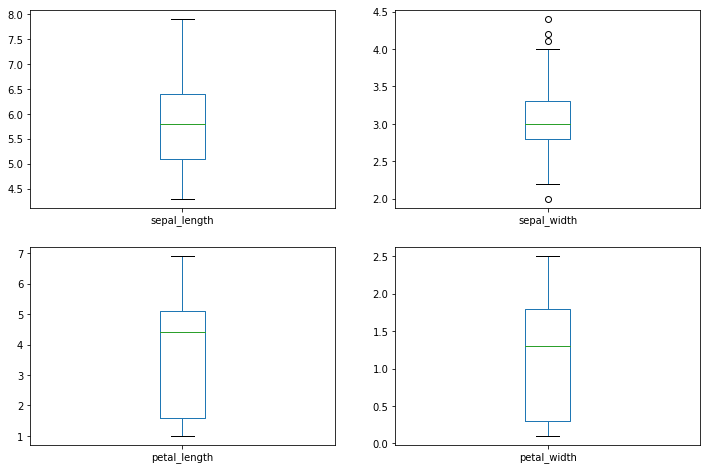

In [25]:
df.plot(kind='box', subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (12,8))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D13C9EB00>,
      dtype=object)

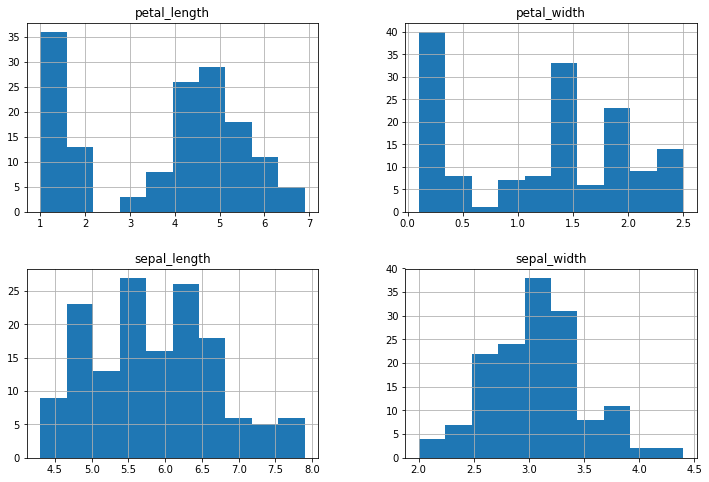

In [27]:
df.hist(figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D14AAD048>,
      dtype=object)

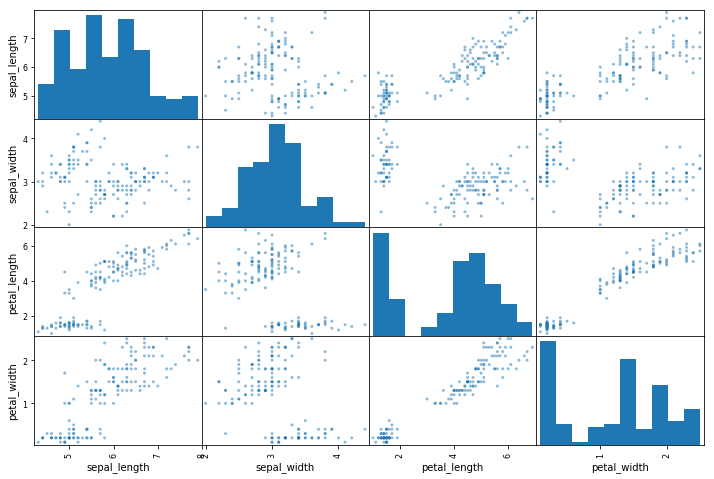

In [29]:
scatter_matrix(df, figsize = (12,8))

In [30]:
array = df.values
X = array[:,0:4]
Y = array[:,4:]
validation_size = 0.20
seed = 7


In [31]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [32]:
seed = 7
scoring = 'accuracy'

In [47]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LR: 0.966667 (0.055277)
LDA: 0.983333 (0.033333)
KNN: 0.975000 (0.053359)
CART: 0.966667 (0.040825)
NB: 0.950000 (0.040825)
SVM: 0.983333 (0.033333)


C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgaut\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

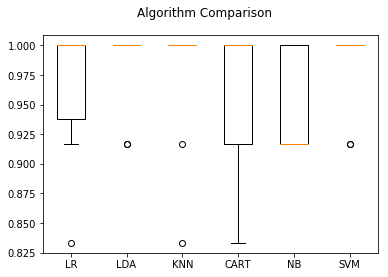

In [56]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_validation)

C:\Users\kgaut\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [58]:
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30

